<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, I will be importing the libraries that will be used throughout my analysis and modelling. |

---

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section I will be loading the data from the `train_set` file into a DataFrame. |

---

In [102]:
# load the data
df = pd.read_csv('train_set.csv')
df1 = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [22]:
# look at data statistics
df.shape

(33000, 2)

In [23]:
df1.shape

(5682, 2)

In [24]:
df.head(5)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [25]:
df1.head(5)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [26]:
df.isnull().sum()

lang_id    0
text       0
dtype: int64

In [27]:
df1.isnull().sum()

index    0
text     0
dtype: int64

In [28]:
# plot relevant feature interactions

In [29]:
type_labels = list(df.lang_id.unique())
print(type_labels)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


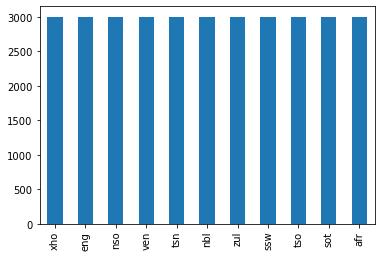

In [30]:
df['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

In [31]:
df['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

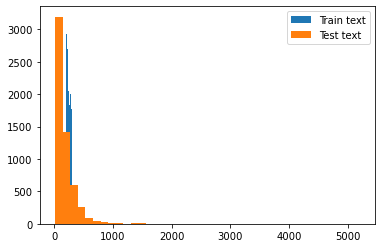

In [32]:
length_train_set = df['text'].str.len()
length_test_set = df1['text'].str.len()
plt.hist(length_train_set , bins = 15, label = 'Train text')
plt.hist(length_test_set , bins = 40, label = 'Test text')
plt.legend()
plt.show()

In [33]:
df['text'].value_counts()

ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le                                               17
ukubhalelwa kuzalisa iimfuneko zomthetho ophathelene nalokhu kungawufelelisa umrholwakho naweqisa iinyanga ezintathu ngokulandelana ungawuthathi umrholwakho nakhona uzakufelela umrholo owuthole ngokungakafaneli kufuze uwubuyise                                                               14
imali osalele ngayo emva nayo seyifakiwe emrholweni wakho wokuthoma nakungenzeka ukuthi imali le ibe yinengi ukudlula isilinganiso sephrovinsi yangekhenu izakuhlukaniswa ngeenyanga eziimbadlwana malungana nalokhu thintana ne-ofisi yezehlalakuhle yangekhenu nawufuna eminye imininingwana    13
sibawa abafakazeli ababili esingakghona ukubathola umrholi womphakathi kunye nesikghwari esiwufundeleko umsebenzi wobukgh

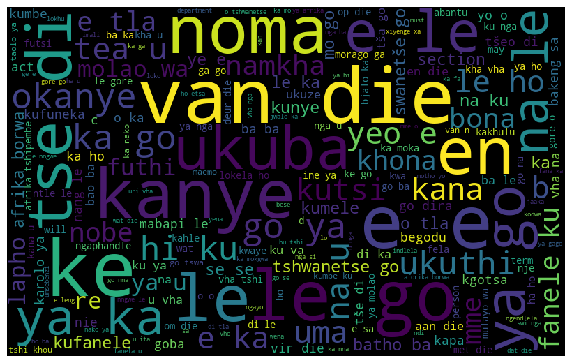

In [100]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10 , 7))
plt.imshow(wordcloud, interpolation = 'none')
plt.axis('off')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section I will be cleaning the dataset, and possibly create new features. |

---

In [103]:
vect = CountVectorizer()
vect.fit(df['text'])
new = vect.transform(df['text'])

In [104]:
new2 = vect.transform(df1['text'])
new3 = new2.toarray()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, I will create one or more models that will be able to accurately predict the Language. |

---

In [111]:
X = new
y = df['lang_id']

In [112]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.000001, random_state=0)

In [113]:
X_train.shape

(32999, 141958)

In [114]:
naive_model = MultinomialNB(alpha=0.05).fit(X_train , y_train)


In [115]:
ypred = naive_model.predict(new3)

In [116]:
output4 = pd.DataFrame({'lang_id': ypred})
output4 = df1[['index']]
output4['lang_id'] = ypred
output4.to_csv('logreg_final.csv', index=False)
output4.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [ ]:
output4.shape

In [37]:
from sklearn.multiclass import OneVsRestClassifier
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train, y_train)

ovr_pred = OvR_clf.predict(new3)

In [41]:
output6 = pd.DataFrame({'lang_id': ovr_pred})
output6 = df1[['index']]
output6['lang_id'] = ovr_pred
output6.to_csv('OVR_final.csv', index=False)
output6.head()

,index,lang_id
0,1,ssw
1,2,nbl
2,3,xho
3,4,ssw
4,5,ssw


In [17]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(new3)

In [19]:
output5 = pd.DataFrame({'lang_id': y_pred})
output5 = df1[['index']]
output5['lang_id'] = y_pred
output5.to_csv('tree.csv', index=False)
output5.head()

,index,lang_id
0,1,xho
1,2,xho
2,3,ven
3,4,ssw
4,5,xho


In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
pred_forest = forest.predict(new3)

In [ ]:
output6 = pd.DataFrame({'lang_id': pred_forest})
output6 = df1[['index']]
output6['lang_id'] = pred_forest
output6.to_csv('forest.csv', index=False)
output6.head()

In [ ]:
ada_boost =AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=42)
ada_boost.fit(X_train, y_train)
pred_ada = ada_boost.predict(new3)

In [ ]:
output7 = pd.DataFrame({'lang_id': pred_ada})
output7 = df1[['index']]
output7['lang_id'] = pred_ada
output7.to_csv('ada.csv', index=False)
output7.head()